In [1]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [98]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']

In [99]:
#def __init__(self, Epoch = 2, Neur_seq = '32_64_64_32', Dataset_train = ['Ocean1'], 
#             Oc_mod_type = 'COM_NEMO-CNRS', Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], 
#             Var_Y = 'meltRate', activ_fct = 'swish', Norm_Choix = 0, verbose = 1, batch_size = 32, Extra_n = '')

In [100]:
importlib.reload(Trainings)
Training = Trainings.Sequencial_training(Trainings.model_NN)
len(Training.Neur_seq_preview(5))

#class Sequencial_training():
#    def training(self, training_extent = 1, verbose = 1, Verify = 1,
#                 Standard_train = ['32_64_64_32'], **kwargs):
#New Better_cutting Var either False or Same_t 
# Same_t : Cut ocean3-4 to same time size as Ocean1-2

46

In [102]:
Best_Neur = ['32_32_96_96'] #, '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
Training.training(training_extent = 0, verbose = 1, batch_size = 128, Exact = 1, message = 1,
            Standard_train = Best_Neur, Dataset_train = OcT, Epoch = 8, 
            Var_X = Var_X_Extra, Verify = 0, Extra_n = 'Same_ind', 
            Similar_training = 1, Norm_Choix = 0)

Projected training regiment :
 ['32_32_96_96']
Starting training for neurone : 32_32_96_96, 0/1 (Previous step : 0.000 s)


KeyError: "['Slope_iceDraft', 'Slope_bathymetry', 'Distances'] not in index"

In [8]:
Best_Neur = ['32_32_96_96', '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
Training.training(training_extent = 0, verbose = 1, batch_size = 128, Exact = 1, message = 1,Standard_train = Best_Neur,
                Dataset_train = OcT, Epoch = 8, Var_X = Var_X_Extra, Verify = 0, 
                  Extra_n = 'Same_ind', Similar_training = 1, Norm_Choix = 0, Drop = 'Default')

Projected training regiment :
 ['32_32_96_96', '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
Starting training for neurone : 32_32_96_96, 0/4 (Previous step : 0.000 s)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [87]:
NN.Get_model_path_json(Var = Var_X2, Ocean = 'Ocean2', Exact = 1, Epoch = 7)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean2/Ep_7_N_32_64_64_32_Ch_0-1646232083_Ex_']


['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean2/Ep_7_N_32_64_64_32_Ch_0-1646232083_Ex_']

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind'] 

Data variables used : temperatureYZ salinityYZ iceDraft7_Ex_Same_ind ,  For Ocean : Ocean4 
[0.2119853]00 / 1200


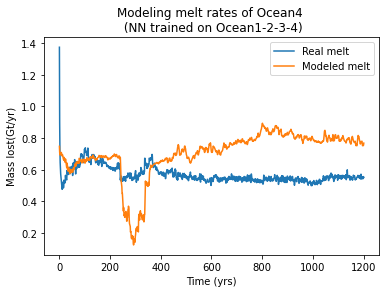

In [88]:
NN.Plot_Melt_time_function(ind = 0,save = True, Epoch = 8, message = 1, 
                Ocean_trained = OcT, Ocean_target = 'Ocean4', NN_attributes = {'Extra_n' : 'Same_ind', 'Neur' : '64_64_64_96_96' })

Data variables used : temperatureYZ salinityYZ iceDraft                                                   
[5.12373887] / 239


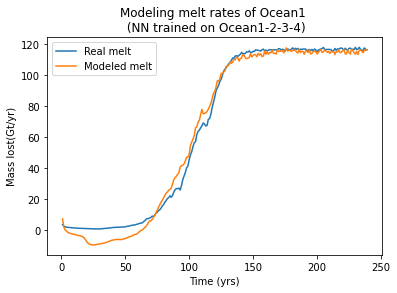

In [28]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'Ocean1', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Data variables used : temperatureYZ salinityYZ iceDraft                                                   
[4.49305391] / 239


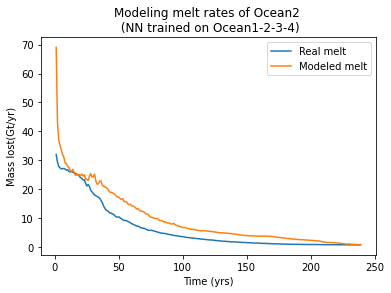

In [29]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'Ocean2', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Data variables used : temperatureYZ salinityYZ iceDraft                                                   
[7.07094149]5 / 1199


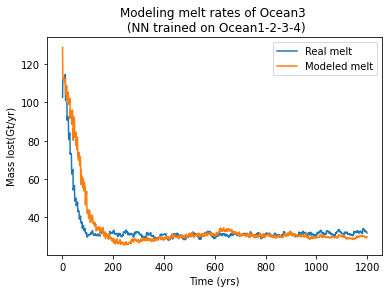

In [30]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'Ocean3', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Data variables used : temperatureYZ salinityYZ iceDraft                                                   
[2.2395014]95 / 1199


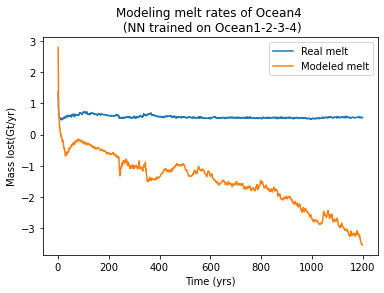

In [31]:
Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 1, Ocean_target = 'Ocean4', 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647598617_Ex_Same_ind
Data variables used : temperatureYZ salinityYZ iceDraft
[1.39546559]5 / 1199


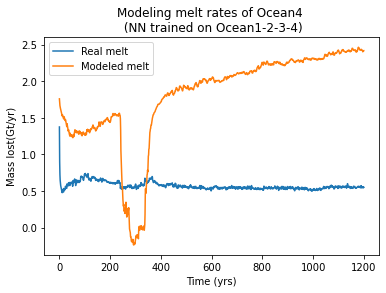

In [85]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_Melt_time_function(save = False, Epoch = 8, message = 1, 
                    Ocean_trained = OcT, Ocean_target = 'Ocean4', NN_attributes = {'Extra_n' : 'Same_ind', 'Cutting' : 'Same_t' })

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_6_N_64_64_64_64_Ch_0-1646005997
Data variables used : x y temperatureYZ salinityYZ iceDraft


(array([-2.22262884e-08,  1.10324840e-09]),
 array([1.69461089e-07, 4.18992240e-08]))

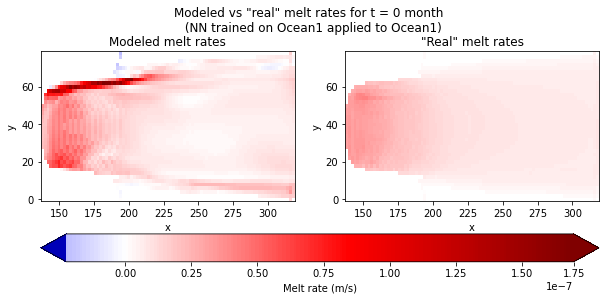

In [84]:
importlib.reload(NN)
NN.Plotting_side_by_side(ind = 23,save = False, Epoch = 6, T = 0, Ocean_target = 'Ocean1', 
            Extra_n = [], Ocean_trained = 'Ocean1', Exact = 1)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_12
Starting 1/24 model Ep_12_N_1_Ch_0-1646054833_Ex_
Starting 2/24 model Ep_12_N_4_Ch_0-1646054967_Ex_
Starting 3/24 model Ep_12_N_8_Ch_0-1646055101_Ex_
Starting 4/24 model Ep_12_N_16_Ch_0-1646055235_Ex_
Starting 5/24 model Ep_12_N_4_16_Ch_0-1646055371_Ex_
Starting 6/24 model Ep_12_N_8_16_Ch_0-1646055514_Ex_
Starting 7/24 model Ep_12_N_16_16_Ch_0-1646055657_Ex_
Starting 8/24 model Ep_12_N_4_32_Ch_0-1646055801_Ex_
Starting 9/24 model Ep_12_N_8_32_Ch_0-1646055943_Ex_
Starting 10/24 model Ep_12_N_16_32_Ch_0-1646056086_Ex_
Starting 11/24 model Ep_12_N_4_64_Ch_0-1646056234_Ex_
Starting 12/24 model Ep_12_N_8_64_Ch_0-1646056381_Ex_
Starting 13/24 model Ep_12_N_16_64_Ch_0-1646056529_Ex_
Starting 14/24 model Ep_12_N_8_32_64_Ch_0-1646056717_Ex_
Starting 15/24 model Ep_12_N_16_32_64_Ch_0-1646056926_Ex_
Starting 16/24 model Ep_12_N_32_32_64_Ch_0-1646057101_Ex_
Starting 17/24 model Ep_12_N_8_64_64_Ch_0-1646057308_Ex_
Starting 18/24 model Ep_12_

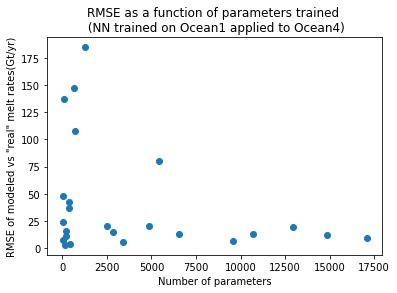

In [11]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 8, Ocean_trained = 'Ocean1', message = 0, Ocean_target = 'Ocean4')

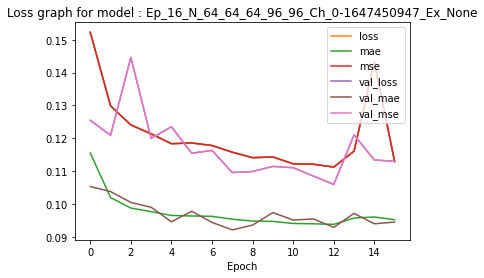

In [8]:
NN.Plot_loss_model(ind = 0, Epoch = 16, Ocean = OcT, Exact = 1) 

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_3
Starting 1/51 model Ep_6_N_1_Ch_0-1646003136
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 2/51 model Ep_4_N_32_64_64_32_Ch_0-1645997060
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 3/51 model Ep_6_N_4_Ch_0-1646003252
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 4/51 model Ep_6_N_8_Ch_0-1646003370
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 5/51 model Ep_6_N_16_Ch_0-1646003488
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 6/51 model Ep_6_N_4_16_Ch_0-1646003607
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 7/51 model Ep_6_N_8_16_Ch_0-1646003735
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 8/51 model Ep_6_N_16_16_Ch_0-1646003862
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 9/51 model Ep_6_N_4_32_Ch_0-1646003992
Data variables used : x y temperat

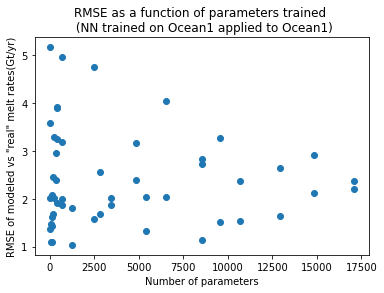

In [16]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = False, Epoch = 3, Ocean_trained = 'Ocean1', message = 1)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_


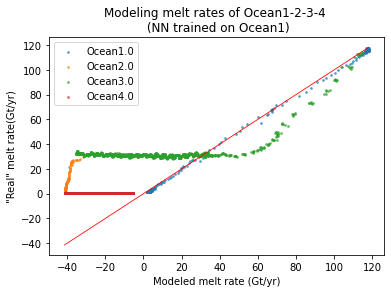

In [12]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 5, 
            Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, Exact = 1, Extra_n = [])

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_


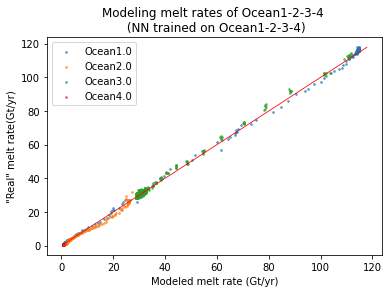

In [13]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 5, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, Exact = 1, Extra_n = [])

In [7]:
#Epoch, Neur, Choix = re.findall('Ep_(\d+)_N_(\w+)_Ch_(\d+)', Test)[0]

In [ ]:
#importlib.reload(Plotting)
#importlib.reload(Computing_functions)
#OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
#Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96_96', 'Ocean' : OcT}
#       ,{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96_96', 'Ocean' : OcT, 'Choix' : 1},
#        {'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96_96', 'Ocean' : OcT, 'Choix' : 2}
#       ]
#Titles=['Normalized mean/std', 'Normalized min/max', 'Normalized median/iqr']
#A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], Oc_tar = 'Ocean3', save = False, Title = Titles)

In [7]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '32_32_96_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Choix' : 0, 'Method_data' : 4}
       ]
Titles=['Small data', 'Big data']

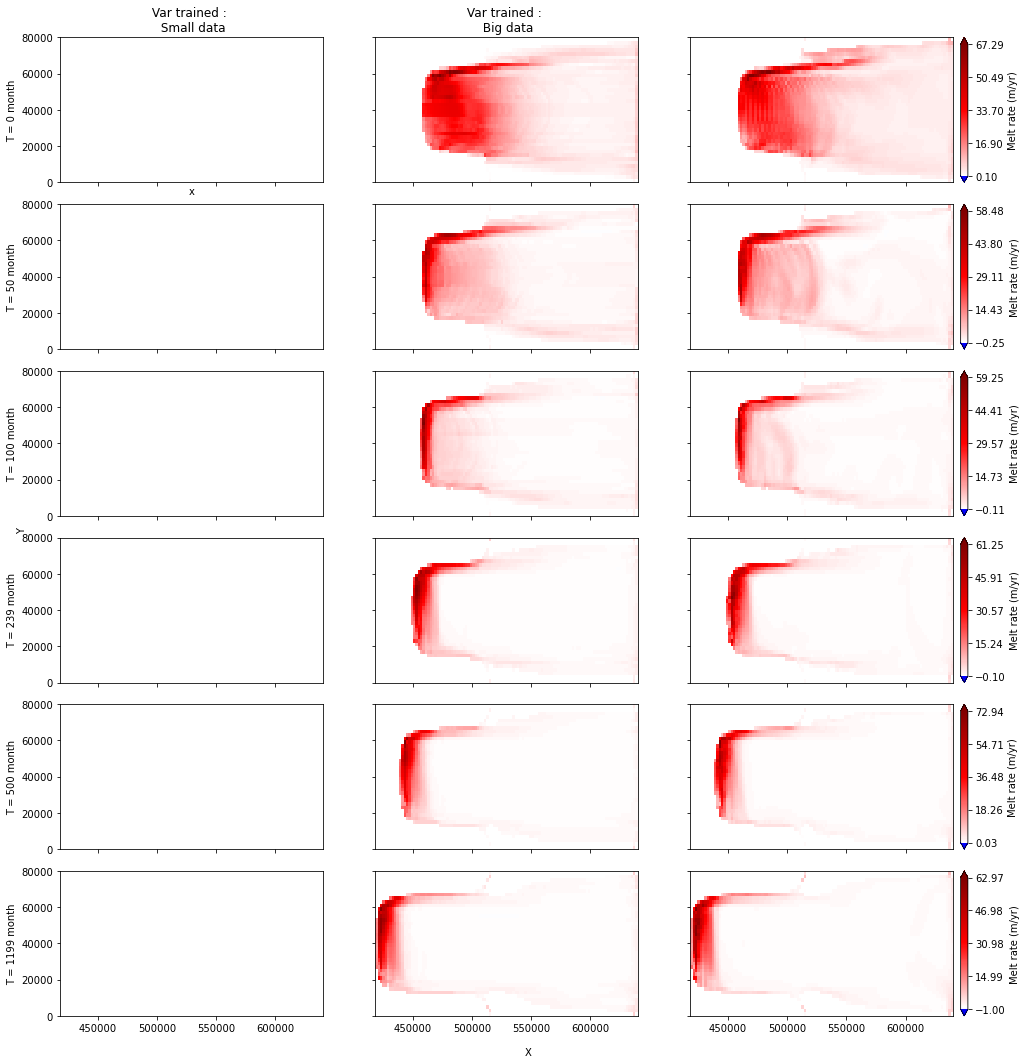

In [49]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '32_32_96_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Choix' : 0, 'Method_data' : 4}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Small data', 'Big data']
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], Oc_tar = 'Ocean3', save = False, Title = Titles)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1646930860_Ex_
Starting 0 / [0, 50, 100, 239]        
Starting 50 / [0, 50, 100, 239]        
Starting 100 / [0, 50, 100, 239]        
Starting 239 / [0, 50, 100, 239]        
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1646930860_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind
Starting 0 / [0, 50, 100, 239]        
Starting 50 / [0, 50, 100, 239]        
Starting 100 / [0, 50, 100, 239]        
Starting 239 / [0, 50, 100, 239]        
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind


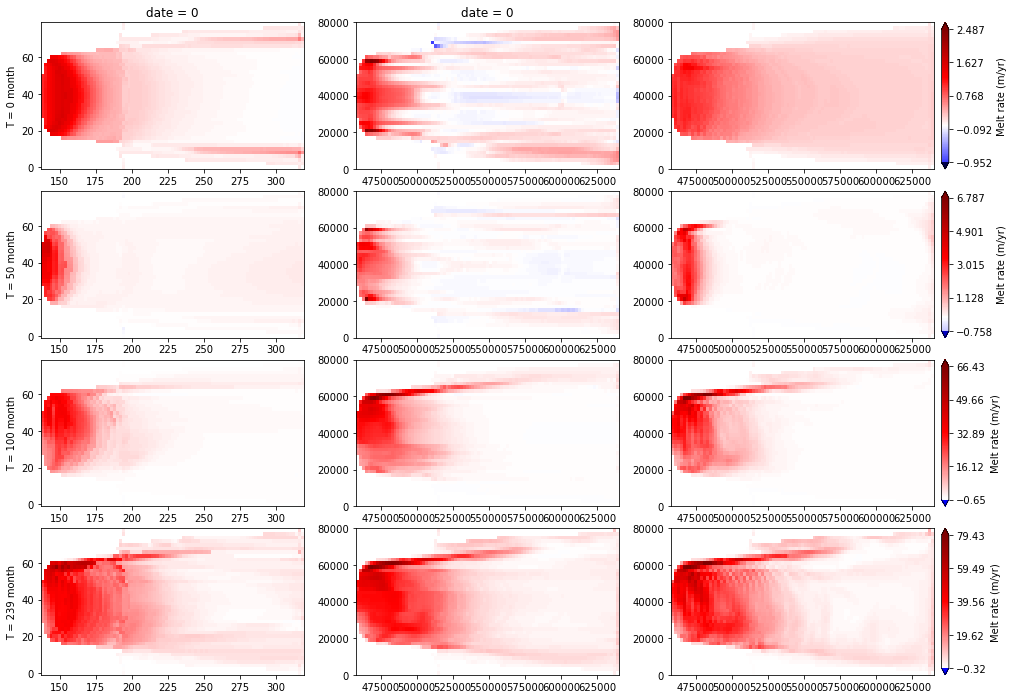

In [96]:
importlib.reload(Plotting)
importlib.reload(Trainings)
importlib.reload(Computing_functions)
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = False, Title = Titles)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1646930860_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1646930860_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind


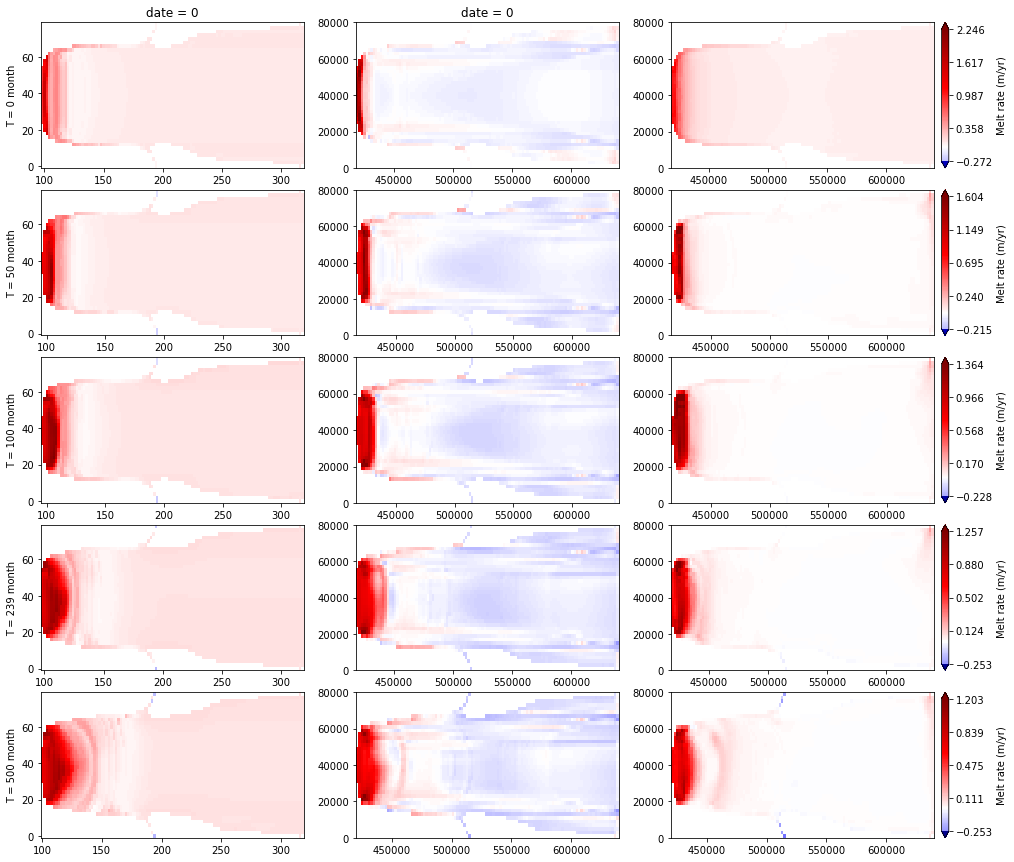

In [107]:
importlib.reload(Plotting)
importlib.reload(Trainings)
importlib.reload(Computing_functions)
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500], Oc_tar = 'Ocean4', 
                save = False, Title = Titles, sharing = False)

In [30]:
len(A[1])

4

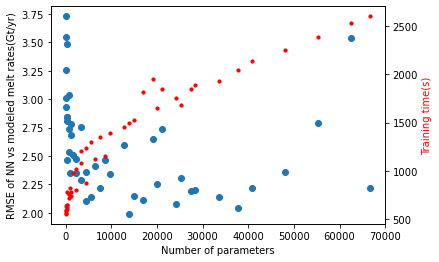

In [61]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
Mod_att = {'Epoch' :8, 'Var' : Var_X_non_position, 
        'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Choix' : 0}
Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = False, Ocean_target = OcT, message = 0, Time = True
                , NN_attributes = Mod_att, load = True)

In [62]:
Path = os.path.join(os.getcwd(), 'Cached_data', 'Total_RMSE_Ep_8_Ch_0_OcT_VarX_non_posit_same_ind.csv')
df = pd.read_csv(Path)
Neur = df['Neur'].values
Param = df['Params'].values
RMSE = df['RMSE'].values
T = df['T'].values

In [64]:
Inds = np.array(RMSE).argsort()[:4]

In [68]:
list(Neur[Inds])

['32_32_96_96', '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']

In [22]:
np.array(RMSE).argsort()[:]

array([0, 2, 1])

In [17]:
glob.glob(os.path.join(os.getcwd()))

46

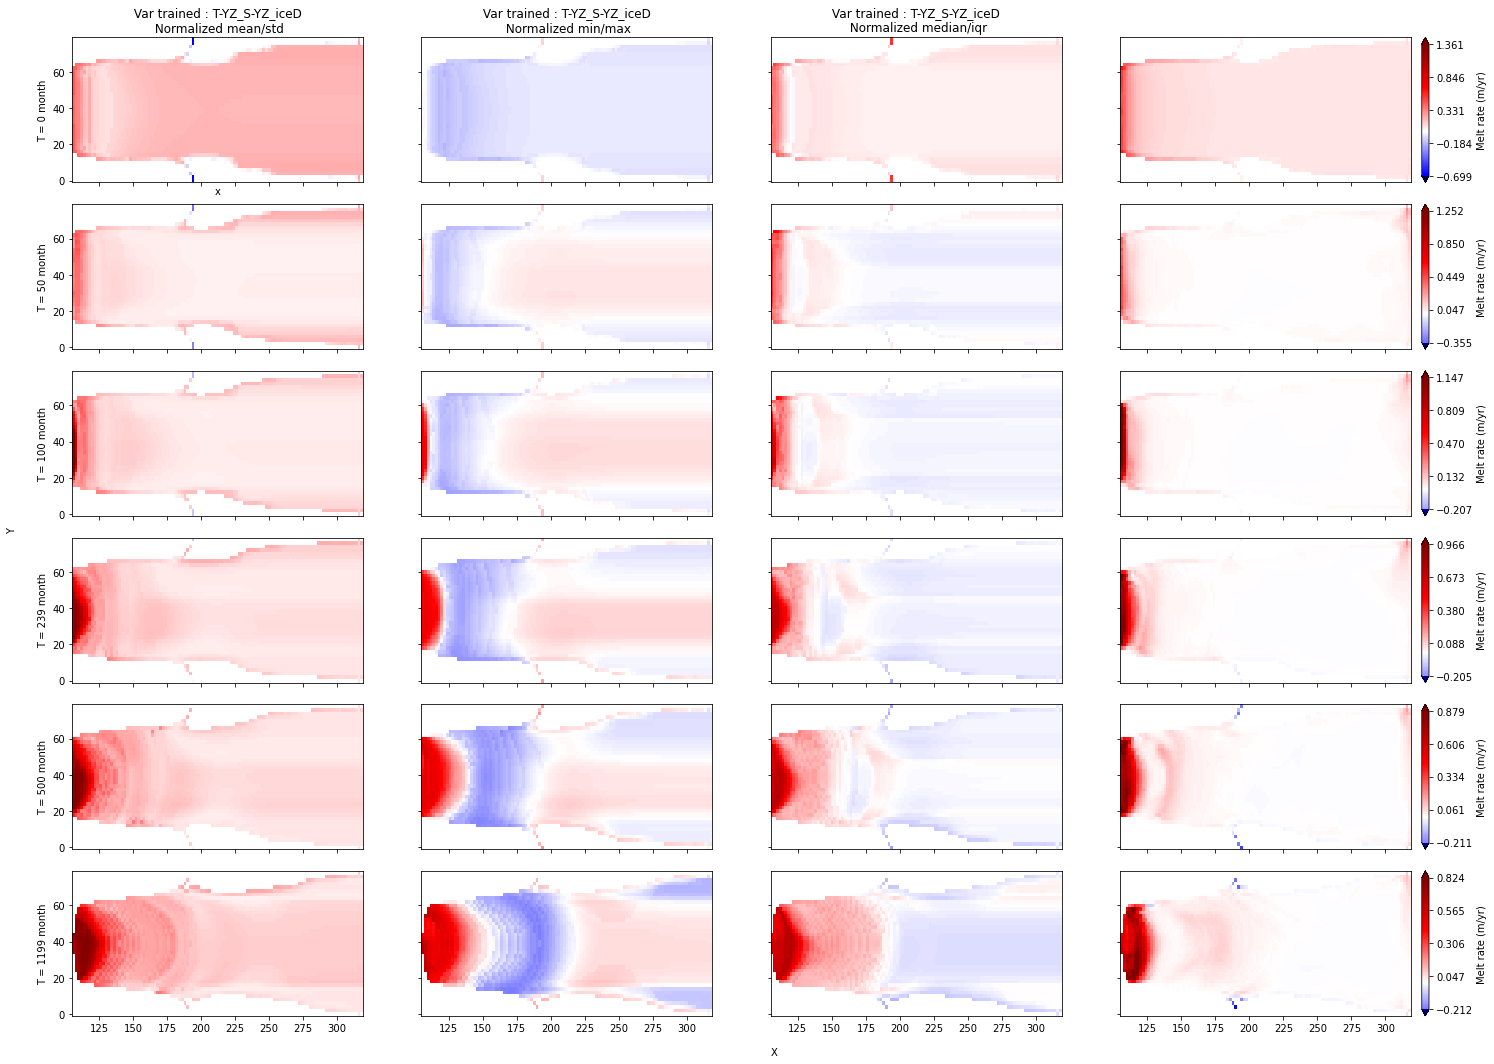

In [48]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], Oc_tar = 'Ocean4', save = False, Title = Titles)

In [ ]:
NN.Plot_loss_model(ind = 0, Epoch = 16, Ocean = OcT, Exact = 1) 

In [ ]:
importlib.reload(NN)
NN.Plot_total_RMSE_param(save = True, Ocean_target = OcT, Epoch = 8, Ocean_trained = OcT, message = 0, Time = True
                , NN_attributes = {'Var' : Var_X_non_position, 'Extra_n' : 'Same_ind'})

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4


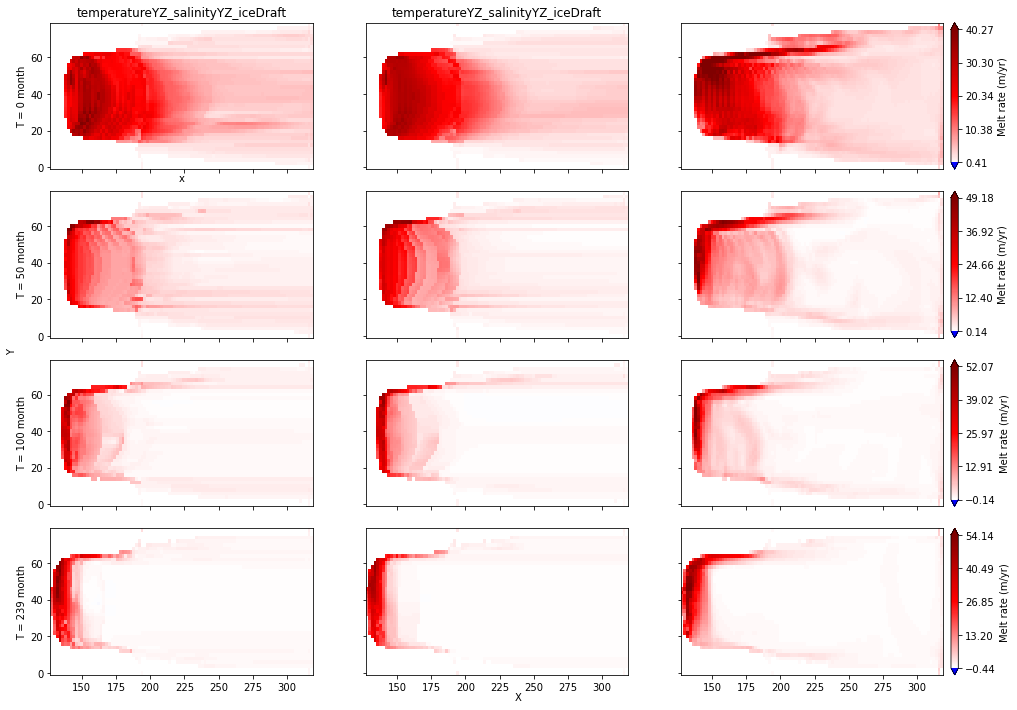

In [38]:
#importlib.reload(NN)
#A = NN.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 239])

#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

A = Plotting.plot_N_side(NN.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean3', save = False)

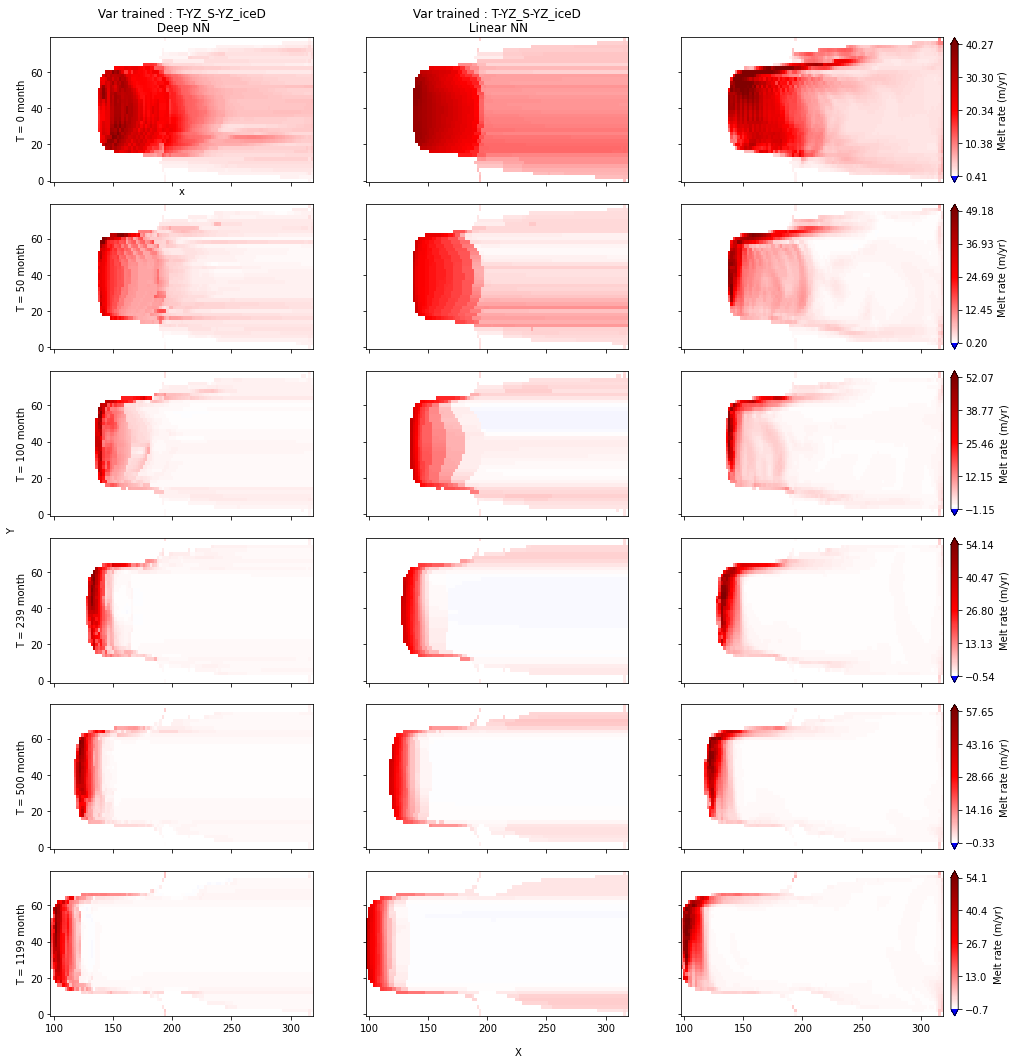

In [18]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '0', 'Ocean' : OcT}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Deep NN', 'Linear NN']
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], 
                        Oc_tar = 'Ocean3', save = True, Title = Titles)

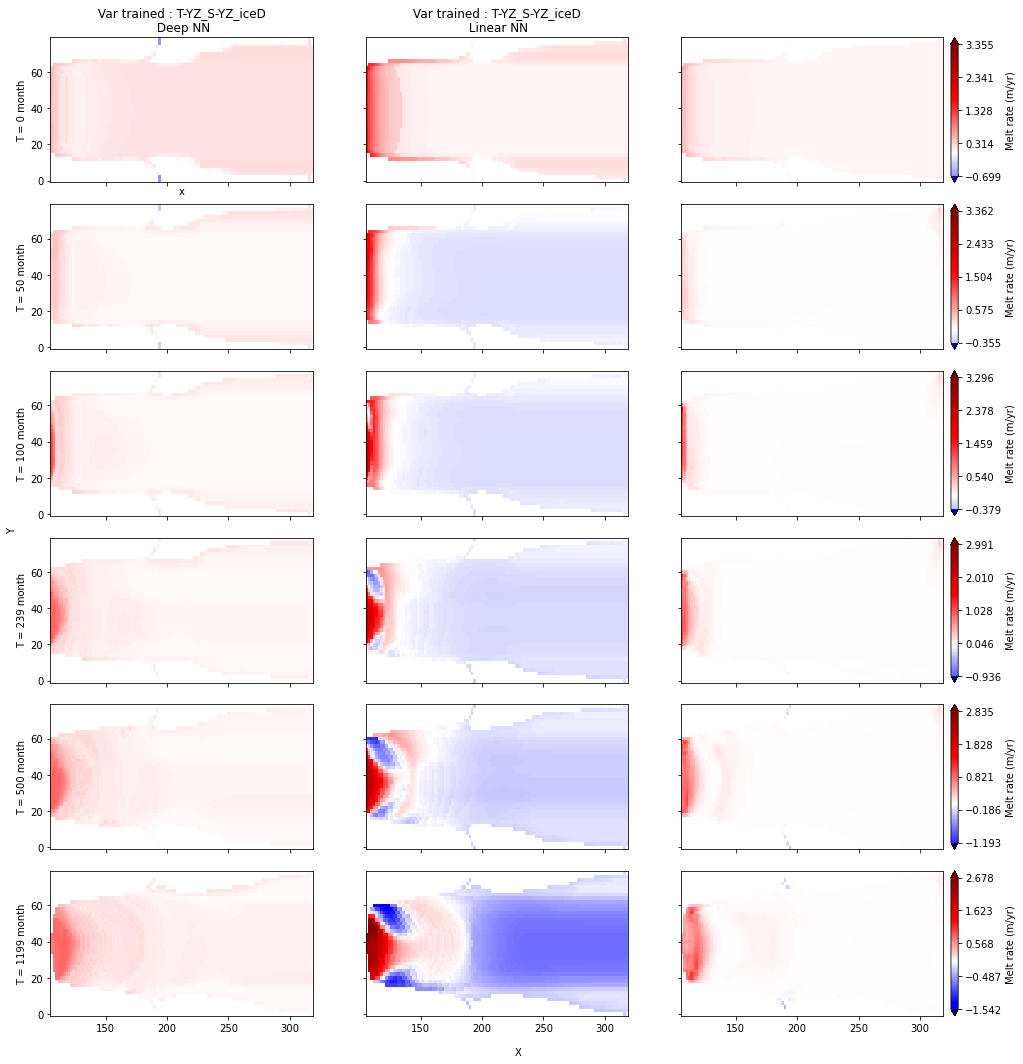

In [19]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500, 1199], 
                        Oc_tar = 'Ocean4', save = True, Title = Titles)

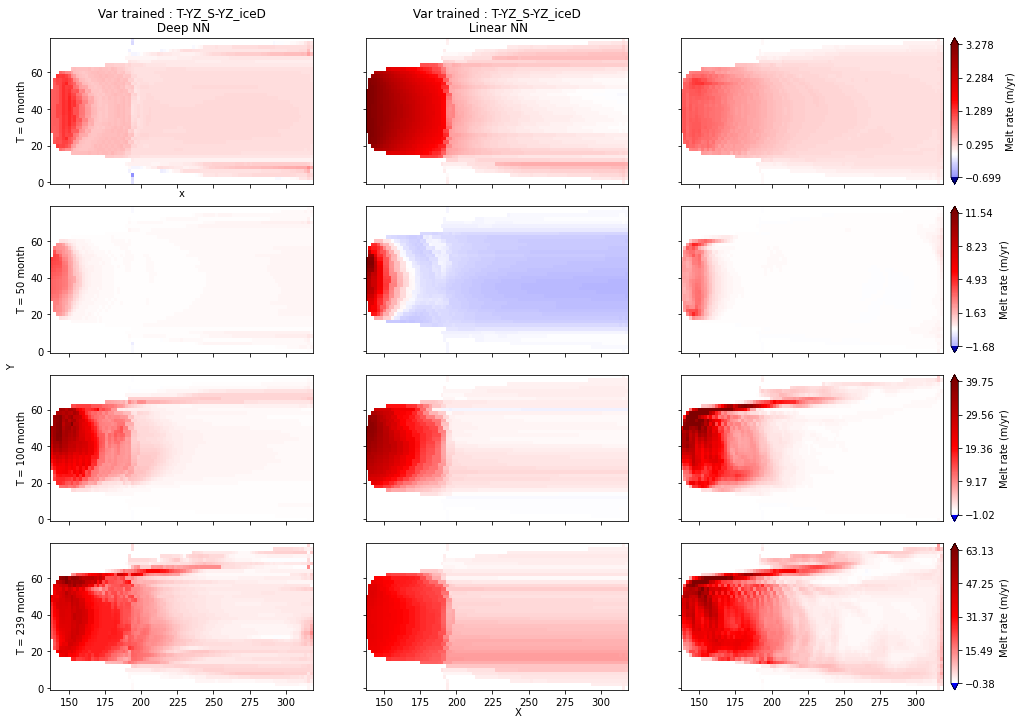

In [20]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
                        Oc_tar = 'Ocean1', save = True, Title = Titles)

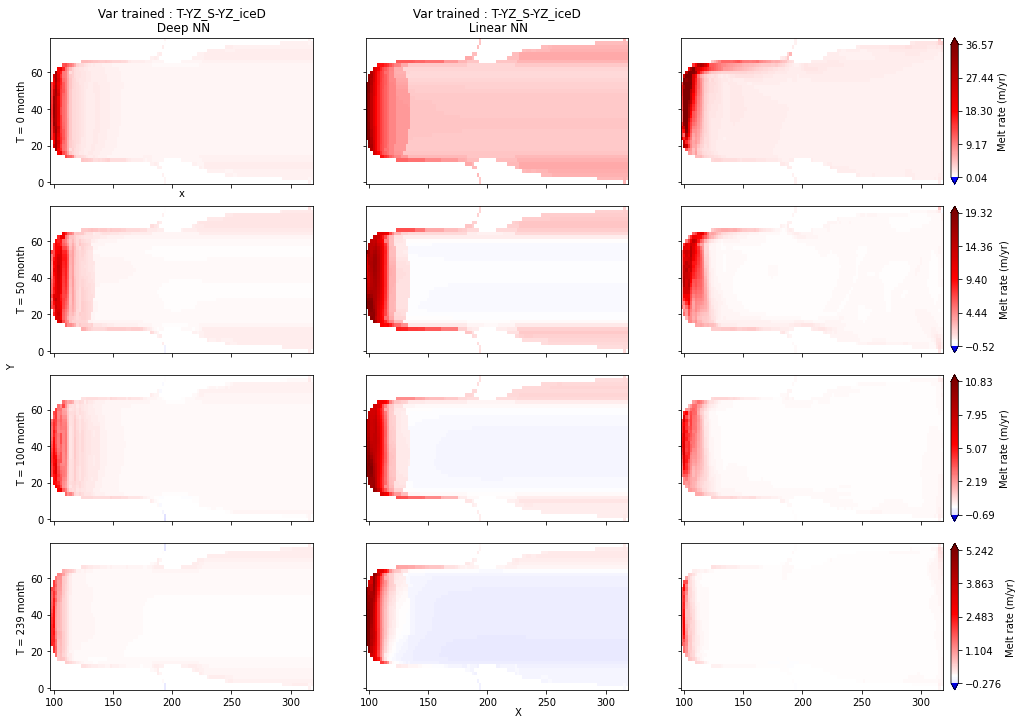

In [21]:
A = Plotting.plot_N_side(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
                        Oc_tar = 'Ocean2', save = True, Title = Titles)